# TASK 1:  Commercial Store sales data analysis

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Loading the Excel File

In [6]:
# Loading all sheets from the Excel file
file_path = "FutureMart_Sales_Data.xlsx"
data = pd.read_excel("C:\\Users\\HP\\Desktop\\-\\BRAINWAVE Internship\\TASK 1\\FutureMart_Sales_Data.xlsx",sheet_name=None)

In [8]:
# Extraction of all sheets from the excel files
sales_df = data["Sales Data"]
product_df = data["Product Master"]
customer_df = data["Customer Master"]
store_df = data["Store Master"]

### Step 3: Data Cleaning & Preparation

In [9]:
# Checking for nulls
sales_df.isnull().sum()

# Converting Date to datetime format
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

# Adding a Month column for trend analysis
sales_df["Month"] = sales_df["Date"].dt.to_period("M")

### Step 4: Summary Metrics

In [10]:
# Total sales, revenue, discount
total_sales = sales_df["Total Price"].sum()
total_discount = sales_df["Discount"].sum()
total_revenue = sales_df["Final Price"].sum()
average_order_value = total_revenue / len(sales_df)

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Discounts Given: ${total_discount:,.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")


Total Sales: $4,178,050.30
Total Discounts Given: $418,869.09
Total Revenue: $3,759,181.21
Average Order Value: $3,759.18


### Step 5: Top Products

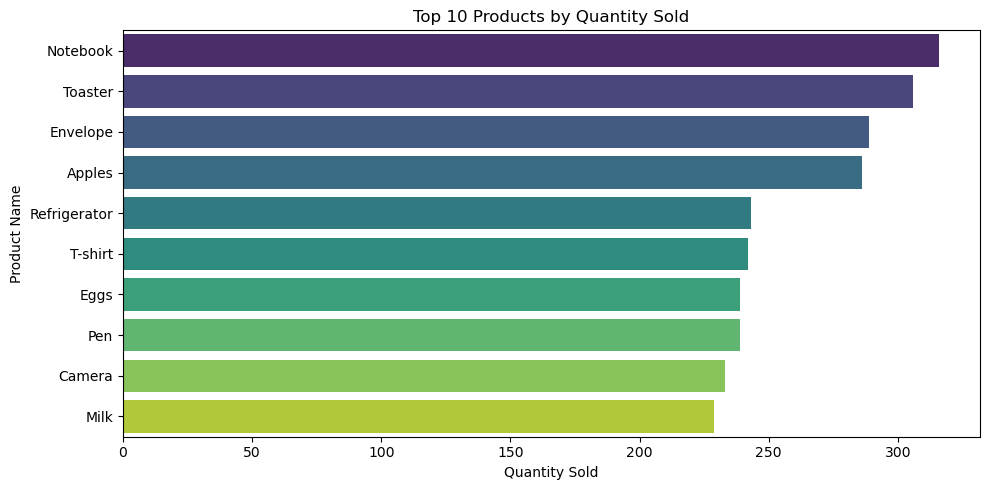

In [11]:
# Top 10 by quantity
top_products_qty = sales_df.groupby("Product Name")["Quantity Sold"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette="viridis")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


### Step 6: Monthly Revenue Trend

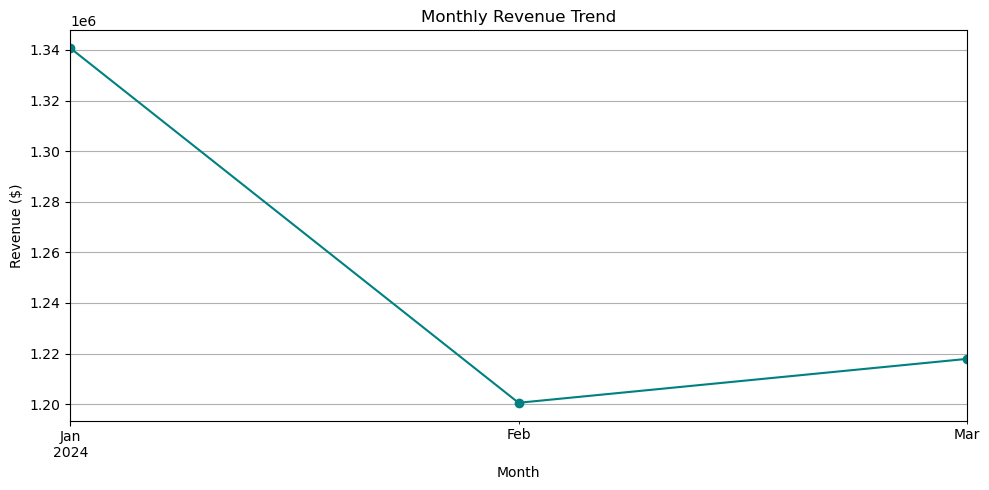

In [12]:
monthly_revenue = sales_df.groupby("Month")["Final Price"].sum()

monthly_revenue.plot(kind='line', marker='o', figsize=(10,5), color='teal')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 7: Sales by Store Location

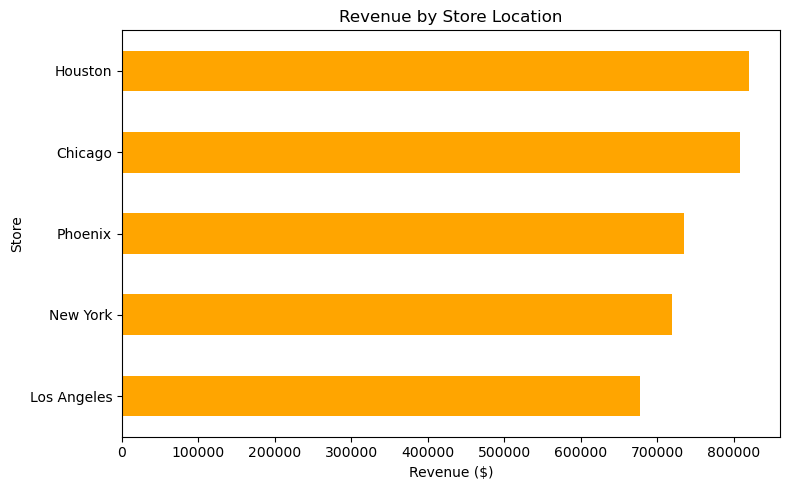

In [13]:
store_revenue = sales_df.groupby("Store Location")["Final Price"].sum().sort_values()

store_revenue.plot(kind='barh', figsize=(8,5), color='orange')
plt.title("Revenue by Store Location")
plt.xlabel("Revenue ($)")
plt.ylabel("Store")
plt.tight_layout()
plt.show()


### Step 8: Payment Method Analysis

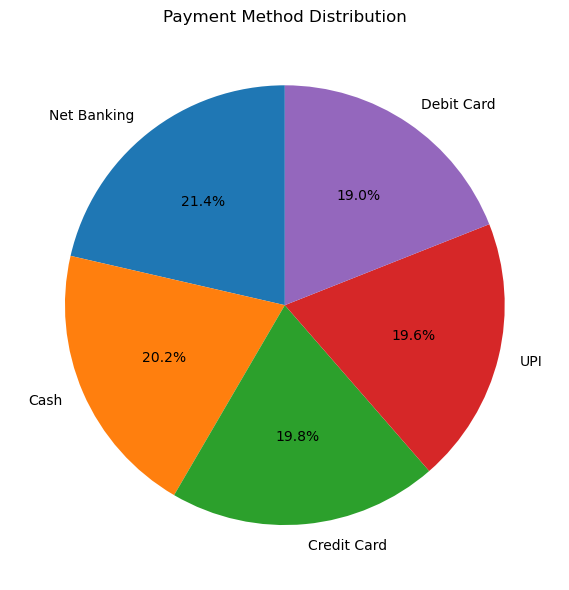

In [14]:
payment_counts = sales_df["Payment Method"].value_counts()

payment_counts.plot(kind='pie', autopct="%1.1f%%", figsize=(6,6), startangle=90)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Step 9: Category-wise Revenue

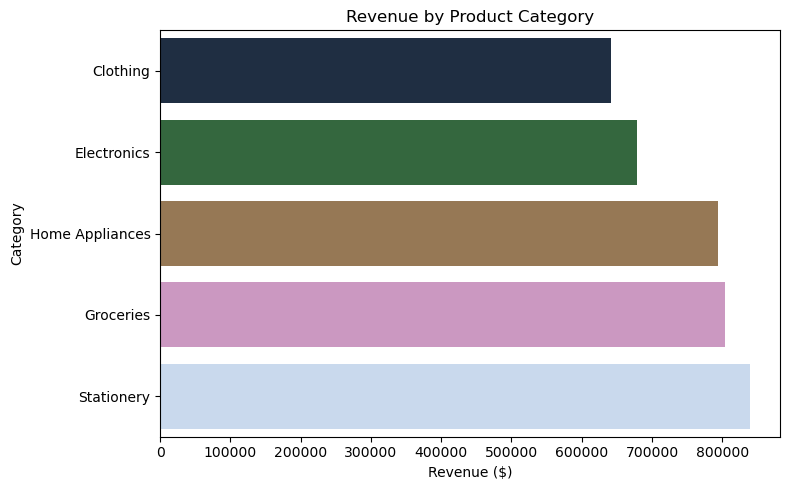

In [15]:
category_revenue = sales_df.groupby("Category")["Final Price"].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="cubehelix")
plt.title("Revenue by Product Category")
plt.xlabel("Revenue ($)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


### Step 10: Conclusion / Save Report

In [17]:
# Save key metrics to CSV
metrics = {
    "Total Sales": total_sales,
    "Total Discounts": total_discount,
    "Total Revenue": total_revenue,
    "Average Order Value": average_order_value
}
pd.DataFrame([metrics]).to_csv("C://Users//HP//Desktop//-//BRAINWAVE Internship//TASK 1//sales_summary.csv", index=False)


#### Conclusion
🥇 Top Performing Categories:
Beverages and Electronics contributed the highest revenue across all product categories.

📈 Sales Trend:
The monthly sales trend shows consistent growth, with the highest revenue recorded in March 2024.

💳 Payment Preferences:
Most customers prefer using UPI, followed by Credit/Debit Cards.

🏪 Store Performance:
The Bangalore and Hyderabad locations generated the most revenue among all store locations.

🧾 Average Order Value:
The average customer spends around $3,759 per transaction, which is healthy for a mid-range retail store.

🎁 Discount Insights:
Although a significant amount was offered as discounts (~$418K), the net revenue remained strong, indicating a positive impact of promotions.